# This Notebook is for Feature selection

In [2170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from plotly.subplots import make_subplots


## Initialize DF

In [2171]:
df = pd.read_csv('../Data/trainZeroNAs.csv')
finalDF= pd.read_csv('../Data/testZeroNAs.csv')

In [2172]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [2173]:
finalDF.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

## Drop Identifier Rows

In [2174]:
df.drop(['Id','Unnamed: 0'], axis = 1, inplace=True)
finalDF.drop(['Id'], axis = 1, inplace = True)

In [2175]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0   None  None        None   
1         Lvl    AllPub       FR2  ...        0   None  None        None   
2         Lvl    AllPub    Inside  ...        0   None  None        None   
3         Lvl    AllPub    Corner  ...        0   None  None        None   
4         Lvl    AllPub       FR2  ...        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## Check for low count of categorical values

In [2176]:
catColumns= df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]

In [2177]:
dropList = []
for i in catColumns.columns:
    for j in catColumns[i].unique():
        if catColumns[catColumns[i] == j].count()[1] == 1:
            print(f'In column {i} value {j} only has 1 row')
            dropList.append([i,j])

In column Utilities value NoSeWa only has 1 row
In column Condition2 value PosA only has 1 row
In column Condition2 value RRAn only has 1 row
In column Condition2 value RRAe only has 1 row
In column RoofMatl value Metal only has 1 row
In column RoofMatl value Membran only has 1 row
In column RoofMatl value Roll only has 1 row
In column RoofMatl value ClyTile only has 1 row
In column Exterior1st value AsphShn only has 1 row
In column Exterior1st value ImStucc only has 1 row
In column Exterior1st value CBlock only has 1 row
In column Exterior2nd value Other only has 1 row
In column Exterior2nd value CBlock only has 1 row
In column ExterCond value Po only has 1 row
In column Heating value Floor only has 1 row
In column HeatingQC value Po only has 1 row
In column Electrical value Mix only has 1 row
In column Functional value Sev only has 1 row
In column MiscFeature value TenC only has 1 row


## Check for Values with High Correlation to Target

In [2178]:
for i in dropList:
    df.drop(df[df[i[0]] == i[1]].index, inplace = True)

In [2179]:
YY = pd.DataFrame(df.corr().SalePrice)
YY.reset_index(inplace = True)
YY.columns = ['Feature', 'Correlation']
YY

Feature  Correlation
0      MSSubClass    -0.085085
1     LotFrontage     0.204271
2         LotArea     0.266565
3     OverallQual     0.792129
4     OverallCond    -0.088405
5       YearBuilt     0.525771
6    YearRemodAdd     0.503147
7      MasVnrArea     0.481163
8      BsmtFinSF1     0.403801
9      BsmtFinSF2    -0.014524
10      BsmtUnfSF     0.217009
11    TotalBsmtSF     0.644868
12       1stFlrSF     0.627608
13       2ndFlrSF     0.319802
14   LowQualFinSF    -0.026075
15      GrLivArea     0.729074
16   BsmtFullBath     0.223301
17   BsmtHalfBath    -0.016055
18       FullBath     0.560577
19       HalfBath     0.283725
20   BedroomAbvGr     0.168823
21   KitchenAbvGr    -0.134535
22   TotRmsAbvGrd     0.543011
23     Fireplaces     0.467323
24     GarageCars     0.639671
25     GarageArea     0.626250
26     WoodDeckSF     0.324866
27    OpenPorchSF     0.315374
28  EnclosedPorch    -0.128861
29      3SsnPorch     0.044926
30    ScreenPorch     0.108751
31       PoolArea     0.098241
32        MiscVal    -0.027328
33         MoSold     0.049140
34         YrSold    -0.024174
35      SalePrice     1.000000

In [2180]:
fig = px.bar(YY.iloc[0:34], x = 'Feature', y ='Correlation', title = 'Correlation of Numerical Variable With Sales Price', color_discrete_sequence = ['#454b59'])
fig.update_layout(
    barmode='stack', 
    xaxis_categoryorder = 'total descending',
    xaxis_title = 'Feature',
    yaxis_title = 'Correlation',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        showgrid = False,
        showline = True,
        linecolor = 'black'
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        showgrid = False,
        showline = False,
        linecolor = 'black'
    
    )
    
)
fig

**There are a lot of area and square footage values with high correlation, perhaps we should combine like to a single metric**  

**Combine Counts of Various items to 1 metric**

### Action Plan  
+ Total Square footage = 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'  
+ Outdoor Square Footage = '3SsnPorch', 'EnclosedPorch', 'WoodDeckSF, 'OpenPorchSF', 'ScreenPorch'  
+ Total Bathrooms = 'Fullbath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'  


In [2181]:
dfSQ = df.loc[:, ['SalePrice', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' ]]
dfSQMelt = pd.melt(dfSQ, id_vars= 'SalePrice' )

In [2182]:
fig = px.scatter(dfSQMelt, x = 'value', y ='SalePrice', color = 'variable',title = 'Sale Price Versus Indoor Square Footage Feature',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 opacity = 0.7,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    xaxis_title = 'Square Footage',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 3500]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig

**The Bimodal nature of basement and 2nd floor skew the linear relationship of these variables, in the future find a method of seperating out observations with no basement or second floor**
**Let's try combing all these variable and see if we maintain a linear relationship**

In [2183]:
dfSQIn = pd.DataFrame(df['SalePrice'])
dfSQIn['IndoorSqFt'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
fig = px.scatter(dfSQIn, x = 'IndoorSqFt', y ='SalePrice',title = 'Sale Price Versus Total Indoor Square Footage',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 opacity = 0.7               
                )


fig.update_layout(
    xaxis_title = 'Square Footage',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 9000]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig

**Dimentionality reduction and a strong linear relationship, that's a win**

### Let's Repeat with outdoor square footage

In [2184]:
dfOutDoor = df.loc[:, ['SalePrice', '3SsnPorch', 'EnclosedPorch', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch' ]]
dfOutDoorMelt = pd.melt(dfOutDoor, id_vars= 'SalePrice' )

In [2185]:
import plotly.graph_objects as go

In [2186]:
fig = px.scatter(dfOutDoorMelt, x = 'value', y ='SalePrice', facet_row = 'variable',title = 'Sale Price Versus Outdoor Square Footage Feature',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E', '#D67AB1', '#B20D30'],
                 trendline = 'ols',
                 opacity = 0.7,
                labels = {'variable':'Feature',                         
                         }
                )
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.YAxis:
        fig.layout[axis].title.text = ''
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''
fig.update_layout(
    xaxis_title = 'Square Footage',
    yaxis_title = '.                               Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        title_standoff = 25,
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 1000]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker=dict(size=6,
                line=dict(width=1,
                color='black')
               ),
    selector=dict(mode='markers')
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_annotations(font_size=18, textangle=0, x=.88, yanchor='top')

fig

**again we have bimodal nature on all features, with a strong representation of zeros**
**does adding all the features maintian a linear relationship?**

In [2187]:
dfOutDoorAdd = pd.DataFrame(df['SalePrice'])
dfOutDoorAdd['OutDoorSQFT'] = df['3SsnPorch'] + df['EnclosedPorch'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['ScreenPorch']
fig = px.scatter(dfOutDoorAdd, x = 'OutDoorSQFT', y ='SalePrice',title = 'Sale Price Versus Total Outdoor Square Footage',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 opacity = 0.7               
                )


fig.update_layout(
    xaxis_title = 'Square Footage',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 1200]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig

**Still a linear relationship, but high variance. Less zeros throwing off relationship**

## Does the same relationship hold true for bathrooms?

In [2188]:
dfBathrooms = df.loc[:, ['SalePrice', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]
dfBathroomsMelt = pd.melt(dfBathrooms, id_vars= 'SalePrice' )


In [2189]:
fig = px.scatter(dfBathroomsMelt, x = 'value', y ='SalePrice', facet_row = 'variable',title = 'Sale Price Versus Bathroom Features',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E', '#D67AB1', '#B20D30'],
                 trendline = 'ols',
                 opacity = 0.7,
                labels = {'variable':'Feature',                         
                         }
                )
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.YAxis:
        fig.layout[axis].title.text = ''
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''
fig.update_layout(
    xaxis_title = 'Number of Bathrooms',
    yaxis_title = '.                               Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        title_standoff = 25,
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 3.5]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker=dict(size=6,
                line=dict(width=1,
                color='black')
               ),
    selector=dict(mode='markers')
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_annotations(font_size=18, textangle=0, x=.88, yanchor='top')

fig

**Only Full baths seems to have a linear relationship, what happens if we combine them?**

In [2190]:
dfBathroomsAdd = pd.DataFrame(df['SalePrice'])
dfBathroomsAdd['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
fig = px.scatter(dfBathroomsAdd, x = 'TotalBathrooms', y ='SalePrice',title = 'Sale Price Versus Total Number of Bathrooms',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 opacity = 0.7               
                )


fig.update_layout(
    xaxis_title = 'Number of Bathrooms',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 6]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig

**There is a linear relationship, I think it is worth doing**

In [2191]:
df['TotSq'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['OutSq'] = df['3SsnPorch'] + df['EnclosedPorch'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['ScreenPorch']
df['TotBr'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
finalDF['TotSq'] = finalDF['TotalBsmtSF'] + finalDF['1stFlrSF'] + finalDF['2ndFlrSF']
finalDF['OutSq'] = finalDF['3SsnPorch'] + finalDF['EnclosedPorch'] + finalDF['WoodDeckSF'] + finalDF['OpenPorchSF'] + finalDF['ScreenPorch']
finalDF['TotBr'] = finalDF['FullBath'] + 0.5 * finalDF['HalfBath'] + finalDF['BsmtFullBath'] + 0.5 * finalDF['BsmtHalfBath']

### Check if relationship between new TotSq is the same as GrLiving Area

In [2192]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x = df.sort_values('SalePrice').SalePrice, y = df.sort_values('SalePrice').TotSq, name = 'Total Square Footage', 
              mode='markers',
              marker=dict(
                  color = '#2AFC98'
              )
              ),
    secondary_y = False
)
fig.add_trace(
    go.Scatter( x = df.sort_values('SalePrice').SalePrice, y = df.sort_values('SalePrice').GrLivArea, name = 'Above Ground Living Area', mode='markers',
              marker=dict(
                  color = '#DE541E'
              )
              ),
   secondary_y = True  
)
fig.update_layout(
    title_text = 'Comparing Total Square Footage and Above Ground Living Area',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
        legend=dict(
        yanchor='bottom',
        y = .1,
        xanchor='right',
        x = 0.92
    ) 
)
fig.update_xaxes(title_text="<b>Sale Price</b>")
fig.update_yaxes(title_text="<b>Total Square Footage (ft^2)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Above Ground Living Area (ft^2)</b>", secondary_y=True)
fig.write_image('C:/Users/jmeis/NYC_DSA/HousingPrices/Images/SquareFootageComparisons.png')
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()

**Looks like my combined indoor square footage feature has the same relationship as GrLivArea, I feel confident dropping the latter**

In [2193]:
df.drop(['GrLivArea'], axis =1, inplace = True)
finalDF.drop(['GrLivArea'], axis =1, inplace = True)

### Drop columns

In [2194]:
droplist = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'EnclosedPorch', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
df.drop(droplist, axis = 1, inplace = True)
finalDF.drop(droplist, axis = 1, inplace = True)
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  None      Reg   
1             20       RL         80.0     9600   Pave  None      Reg   
2             60       RL         68.0    11250   Pave  None      IR1   
3             70       RL         60.0     9550   Pave  None      IR1   
4             60       RL         84.0    14260   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave  None      Reg   
1456          20       RL         85.0    13175   Pave  None      Reg   
1457          70       RL         66.0     9042   Pave  None      Reg   
1458          20       RL         68.0     9717   Pave  None      Reg   
1459          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub    Inside  ...        None       0      2   2008   
1            Lvl    AllPub       FR2  ...        None       0      5   2007   
2            Lvl    AllPub    Inside  ...        None       0      9   2008   
3            Lvl    AllPub    Corner  ...        None       0      2   2006   
4            Lvl    AllPub       FR2  ...        None       0     12   2008   
...          ...       ...       ...  ...         ...     ...    ...    ...   
1455         Lvl    AllPub    Inside  ...        None       0      8   2007   
1456         Lvl    AllPub    Inside  ...        None       0      2   2010   
1457         Lvl    AllPub    Inside  ...        Shed    2500      5   2010   
1458         Lvl    AllPub    Inside  ...        None       0      4   2010   
1459         Lvl    AllPub    Inside  ...        None       0      6   2008   

     SaleType SaleCondition  SalePrice  TotSq  OutSq  TotBr  
0          WD        Normal     208500   2566     61    3.5  
1          WD        Normal     181500   2524    298    2.5  
2          WD        Normal     223500   2706     42    3.5  
3          WD       Abnorml     140000   2473    307    2.0  
4          WD        Normal     250000   3343    276    3.5  
...       ...           ...        ...    ...    ...    ...  
1455       WD        Normal     175000   2600     40    2.5  
1456       WD        Normal     210000   3615    349    3.0  
1457       WD        Normal     266500   3492     60    2.0  
1458       WD        Normal     142125   2156    478    2.0  
1459       WD        Normal     147500   2512    804    2.5  

[1442 rows x 70 columns]

#### Idea, combine all quality metrics into a single quality converting text to ordinal weighted by correlation

In [2195]:
QualityCols = ['OverallQual','OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC' ]

**Some condition columns are nominal convert to ordinal with a lowest value of 0 Highest of 10**

In [2196]:
## ExterQual

replaceDict = {'Ex': 10, 'Gd':8, 'TA': 6, 'Fa':4, 'Po':2, 'None': 0}
df = df.replace({'ExterQual': replaceDict})
finalDF = finalDF.replace({'ExterQual': replaceDict})
print(df.ExterQual.value_counts(), finalDF.ExterQual.value_counts())


6     893
8     486
10     50
4      13
Name: ExterQual, dtype: int64 6     884
8     491
10     55
4      18
Name: ExterQual, dtype: int64


In [2197]:
## ExterCond
df = df.replace({'ExterCond': replaceDict})
finalDF = finalDF.replace({'ExterCond': replaceDict})
df.ExterCond.value_counts()

6     1268
8      145
4       27
10       2
Name: ExterCond, dtype: int64

In [2198]:
## BsmtQual

df = df.replace({'BsmtQual': replaceDict})
finalDF = finalDF.replace({'BsmtQual': replaceDict})
df.BsmtQual.value_counts()

6     641
8     612
10    120
0      35
4      34
Name: BsmtQual, dtype: int64

In [2199]:
## BsmtCond
replaceDict = {'Ex': 10, 'Gd':8, 'TA': 6, 'Fa':4, 'Po':2, 'None': 0}
df = df.replace({'BsmtCond': replaceDict})
finalDF = finalDF.replace({'BsmtCond': replaceDict})
df.BsmtCond.value_counts()

6    1296
8      65
4      45
0      35
2       1
Name: BsmtCond, dtype: int64

In [2200]:
# GarageQual
df = df.replace({'GarageQual': replaceDict})
finalDF = finalDF.replace({'GarageQual': replaceDict})
df.GarageQual.value_counts()

6     1297
0       79
4       48
8       13
10       3
2        2
Name: GarageQual, dtype: int64

In [2201]:
# GarageCond
df = df.replace({'GarageCond': replaceDict})
finalDF = finalDF.replace({'GarageCond': replaceDict})
df.GarageCond.value_counts()

6     1313
0       79
4       33
8        9
2        6
10       2
Name: GarageCond, dtype: int64

In [2202]:
#KitchenQual
df = df.replace({'KitchenQual': replaceDict})
finalDF = finalDF.replace({'KitchenQual': replaceDict})
df.KitchenQual.value_counts()

6     724
8     581
10     99
4      38
Name: KitchenQual, dtype: int64

In [2203]:
# FireplaceQu
df = df.replace({'FireplaceQu': replaceDict})
finalDF = finalDF.replace({'FireplaceQu': replaceDict})
df.FireplaceQu.value_counts()

0     682
8     377
6     308
4      32
10     24
2      19
Name: FireplaceQu, dtype: int64

In [2204]:
# PoolQC
df = df.replace({'PoolQC': replaceDict})
finalDF = finalDF.replace({'PoolQC': replaceDict})
df.PoolQC.value_counts()

0     1437
10       2
8        2
4        1
Name: PoolQC, dtype: int64

## Let's Graph our new numerical quality variables against sale price and see if there are linear relationships

In [2205]:
dfQualAll = df.loc[:,['SalePrice','OverallQual','ExterQual','BsmtQual', 'KitchenQual', 'FireplaceQu', 'GarageQual','PoolQC']]
dfQualMelt = pd.melt(dfQualAll, id_vars='SalePrice')
dfQualMelt
dfCondAll = df.loc[:,['SalePrice','OverallCond', 'ExterCond', 'BsmtCond', 'GarageCond']]
dfCondMelt = pd.melt(dfCondAll, id_vars='SalePrice')


In [2206]:
fig = px.scatter(dfQualMelt, x = 'value', y ='SalePrice', facet_row = 'variable',title = 'Sale Price Versus Quality of Feature',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E', '#D67AB1', '#B20D30'],
                 width=1200, height=1200,
                 trendline='ols',
                 opacity = 0.7,
                labels = {'variable':'Feature',                         
                         }
                )
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.YAxis:
        fig.layout[axis].title.text = ''
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''
fig.update_layout(
    xaxis_title = 'Score',
    yaxis_title = '.                                                                                                                                               Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        title_standoff = 25,
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 12]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker=dict(size=6,
                line=dict(width=1,
                color='black')
               ),
    selector=dict(mode='markers')
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_annotations(font_size=18, textangle=0,x = 0.88)

fig

**Fireplace, Garage Quality and Pool Quality Do not seem to have a linear relationshipi to price, drop them**

In [2207]:
fig = px.scatter(dfCondMelt, x = 'value', y ='SalePrice', facet_row = 'variable',title = 'Sale Price Versus Condition of Feature',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E', '#D67AB1', '#B20D30'],
                 width=1200, height=1200,
                 trendline='ols',
                 opacity = 0.7,
                labels = {'variable':'Feature',                         
                         }
                )
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.YAxis:
        fig.layout[axis].title.text = ''
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''
fig.update_layout(
    xaxis_title = 'Score',
    yaxis_title = '.                                                                                                                            Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        title_standoff = 25,
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 10]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker=dict(size=6,
                line=dict(width=1,
                color='black')
               ),
    selector=dict(mode='markers')
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_annotations(font_size=20, textangle=90, yanchor='top')

fig

**None of the condition columns have a linear relationship with price, drop them all**

### Determine correlation of new numeric Columns

In [2208]:
fig = px.bar(x = df.corr().index, y =df.corr().SalePrice,
            title = 'Correlation of Numerical Variable With Sales Price',
             color_discrete_sequence = ['#5F4B8B']
            )
fig.update_layout(
    barmode='stack', 
    xaxis_categoryorder = 'total descending',
    xaxis_title = 'Feature',
    yaxis_title = 'Correlation',
    title_x=0.5,
    plot_bgcolor = 'white',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        showgrid = False,
        showline = True,
        linecolor = 'black'
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        showgrid = False,
        showline = False,
        linecolor = 'black'
        
    )
    
)
fig

**Looks like the quality variables are more impactful in general than the condition ones, but I don't think we can combine them without introducing error**

### Drop Old Qual and Cond Columns

In [2209]:
for i in ['OverallCond','ExterCond', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']:
    df.drop(i, axis = 1, inplace = True)
    finalDF.drop(i, axis = 1, inplace = True)

In [2210]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  None      Reg   
1             20       RL         80.0     9600   Pave  None      Reg   
2             60       RL         68.0    11250   Pave  None      IR1   
3             70       RL         60.0     9550   Pave  None      IR1   
4             60       RL         84.0    14260   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave  None      Reg   
1456          20       RL         85.0    13175   Pave  None      Reg   
1457          70       RL         66.0     9042   Pave  None      Reg   
1458          20       RL         68.0     9717   Pave  None      Reg   
1459          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub    Inside  ...        None       0      2   2008   
1            Lvl    AllPub       FR2  ...        None       0      5   2007   
2            Lvl    AllPub    Inside  ...        None       0      9   2008   
3            Lvl    AllPub    Corner  ...        None       0      2   2006   
4            Lvl    AllPub       FR2  ...        None       0     12   2008   
...          ...       ...       ...  ...         ...     ...    ...    ...   
1455         Lvl    AllPub    Inside  ...        None       0      8   2007   
1456         Lvl    AllPub    Inside  ...        None       0      2   2010   
1457         Lvl    AllPub    Inside  ...        Shed    2500      5   2010   
1458         Lvl    AllPub    Inside  ...        None       0      4   2010   
1459         Lvl    AllPub    Inside  ...        None       0      6   2008   

     SaleType SaleCondition  SalePrice  TotSq  OutSq TotBr  
0          WD        Normal     208500   2566     61   3.5  
1          WD        Normal     181500   2524    298   2.5  
2          WD        Normal     223500   2706     42   3.5  
3          WD       Abnorml     140000   2473    307   2.0  
4          WD        Normal     250000   3343    276   3.5  
...       ...           ...        ...    ...    ...   ...  
1455       WD        Normal     175000   2600     40   2.5  
1456       WD        Normal     210000   3615    349   3.0  
1457       WD        Normal     266500   3492     60   2.0  
1458       WD        Normal     142125   2156    478   2.0  
1459       WD        Normal     147500   2512    804   2.5  

[1442 rows x 63 columns]

## Convert GarageYrBlt to numeric

### Convert None Values to 0

In [2211]:
df.loc[df['GarageYrBlt']=='None','GarageYrBlt' ] = 0
finalDF.loc[finalDF['GarageYrBlt']=='None','GarageYrBlt' ] = 0

In [2212]:
df.GarageYrBlt = pd.to_numeric(df.GarageYrBlt)
finalDF.GarageYrBlt = pd.to_numeric(finalDF.GarageYrBlt)

In [2213]:
df.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1442, dtype: float64

## Check for linear relationship with Garage Year Built Column

In [2214]:
fig = px.scatter(df, x = 'GarageYrBlt', y ='SalePrice',title = 'Sale Price Versus Year Garage Built',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 opacity = 0.7               
                )


fig.update_layout(
    xaxis_title = 'Year Garage Built',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [1900, 2020]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig

**Not a linear relationship, drop column**

In [2215]:
df.drop(['GarageYrBlt'], axis =1, inplace = True)
finalDF.drop(['GarageYrBlt'], axis =1, inplace = True)

## Convert Basement Finished and Unfinished Sq ft to percentage finished sq ft

In [2216]:
df['BsmtPerFin'] = (df['BsmtFinSF1'] + df['BsmtFinSF2']) / (df['BsmtUnfSF']+ df['BsmtFinSF1'] + df['BsmtFinSF2'])
finalDF['BsmtPerFin'] = (finalDF['BsmtFinSF1'] + finalDF['BsmtFinSF2']) / (finalDF['BsmtUnfSF']+ finalDF['BsmtFinSF1'] + finalDF['BsmtFinSF2'])

**Drop the previous 3 columns**

In [2217]:
df = df.drop(['BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF'], axis = 1)
finalDF = finalDF.drop(['BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF'], axis = 1)

**Convert Nans in new columns to zeros**

In [2218]:
df['BsmtPerFin'] = df['BsmtPerFin'].fillna(0)
finalDF['BsmtPerFin'] = finalDF['BsmtPerFin'].fillna(0)

**This improves R Squared of EleasticNet Model from 86.1 to 86.7%**

In [2219]:
fig = px.scatter(df, x = 'BsmtPerFin', y ='SalePrice',title = 'Sale Price Versus Percentage Of Basement "Finished"',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 opacity = 0.7               
                )


fig.update_layout(
    xaxis_title = 'Percent',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0,1]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig

**no linear relationship, drop column**

In [2220]:
df.drop(['BsmtPerFin'], axis = 1, inplace = True)
finalDF.drop(['BsmtPerFin'], axis = 1, inplace = True)

## Convert Basement Quality columns to numeric and average the two

In [2221]:
df.BsmtFinType1.value_counts()

Unf     426
GLQ     413
ALQ     218
BLQ     146
Rec     132
LwQ      72
None     35
Name: BsmtFinType1, dtype: int64

In [2222]:
replaceDict2 = {'None' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ': 6}


In [2223]:
df = df.replace({'BsmtFinType1': replaceDict2, 'BsmtFinType2': replaceDict2})
finalDF = finalDF.replace({'BsmtFinType1': replaceDict2, 'BsmtFinType2': replaceDict2})


In [2224]:
df.loc[:,['BsmtFinType1', 'BsmtFinType2']].value_counts()

BsmtFinType1  BsmtFinType2
1             1               426
6             1               389
5             1               165
4             1               111
3             1               109
2             1                46
0             0                35
5             3                21
              4                15
4             3                15
5             2                15
4             2                12
3             4                11
6             2                10
2             5                 9
3             2                 8
6             3                 7
2             3                 7
              6                 6
4             6                 5
6             5                 4
3             5                 4
2             4                 4
5             6                 2
4             5                 2
6             4                 2
              0                 1
4             4                 1
dtype: int64

**Let's look at relationship between basement quality types and house price**

In [2225]:
dfBasement = df.loc[:,['SalePrice', 'BsmtFinType1', 'BsmtFinType2']]
dfBaseMelt = pd.melt(dfBasement, id_vars='SalePrice')
dfBaseMelt


SalePrice      variable  value
0        208500  BsmtFinType1      6
1        181500  BsmtFinType1      5
2        223500  BsmtFinType1      6
3        140000  BsmtFinType1      5
4        250000  BsmtFinType1      6
...         ...           ...    ...
2879     175000  BsmtFinType2      1
2880     210000  BsmtFinType2      3
2881     266500  BsmtFinType2      1
2882     142125  BsmtFinType2      3
2883     147500  BsmtFinType2      2

[2884 rows x 3 columns]

In [2226]:
fig = px.scatter(dfBaseMelt, x = 'value', y ='SalePrice',color = 'variable', title = 'Sale Price Versus Basement Quality Level',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 opacity = 0.7               
                )


fig.update_layout(
    xaxis_title = 'Basement Quality Level',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0,10]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig

**There Doesn't seem to be a linear relationship here**
**What about on a combined Value**

In [2227]:
fig = px.scatter(df, x = df.BsmtFinType1 + df.BsmtFinType2, y ='SalePrice',title = 'Sale Price Versus Combined Basement Quality',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 opacity = 0.7               
                )


fig.update_layout(
    xaxis_title = 'Basement Quality',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0,10]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig

**Any Linear Combination of Values Produces the Same Relationship**

In [2228]:
df['BsmtFinish'] = df['BsmtFinType1'] + df['BsmtFinType2']
finalDF['BsmtFinish'] = finalDF['BsmtFinType1'] + finalDF['BsmtFinType2']
df = df.drop(['BsmtFinType1', 'BsmtFinType2'], axis = 1)
finalDF = finalDF.drop(['BsmtFinType1', 'BsmtFinType2'], axis = 1)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'PoolArea', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'TotSq', 'OutSq',
       'TotBr', 'BsmtFinish'],
      dtype='object')

**Trivial Drop to 86.6 from 86.7, still think its worth it to simplify model**

## Let's Look at VIF data and see if we can eliminate some columns

In [2229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_data = pd.DataFrame()
J = df.drop(['SalePrice'], axis =1)
J = J.select_dtypes(['number'])
vif_data['Feature'] = J.columns
vif_data['VIF'] = [vif(J.values, i) for i in range(len(J.columns))]
vif_data

Feature           VIF
0     MSSubClass      3.661103
1    LotFrontage      6.816312
2        LotArea      5.241332
3    OverallQual     76.335728
4      YearBuilt  11648.194337
5   YearRemodAdd  19672.494145
6     MasVnrArea      1.795879
7      ExterQual    107.022327
8       BsmtQual     42.443337
9   LowQualFinSF      1.107528
10  BedroomAbvGr     29.704207
11  KitchenAbvGr     36.698795
12   KitchenQual     77.040435
13  TotRmsAbvGrd     66.781294
14    Fireplaces      2.803634
15    GarageCars     36.874963
16    GarageArea     30.664555
17      PoolArea      1.035900
18       MiscVal      1.021931
19        MoSold      6.603392
20        YrSold  22378.343953
21         TotSq     52.673485
22         OutSq      2.984130
23         TotBr     23.448501
24    BsmtFinish      7.760292

## Year Columns (YearBuilt, YearRemodAdd, YrSold) Have Very High VIF, let's Simplify

In [2230]:
dfYearMelt = df[['YearBuilt', 'YearRemodAdd', 'SalePrice']]
dfYearMelt = pd.melt(dfYearMelt, id_vars='SalePrice')
dfYearMelt
fig = px.histogram(dfYearMelt, x = 'value', color = 'variable', nbins = 200, color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Histogram of Year House Built and Year House Remodeled',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0,225]

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [1900,2010]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)
fig.update_xaxes(title_text = '<b>Year</b>')
fig.update_yaxes(title_text = '<b>Count</b>')
fig.write_image('C:/Users/jmeis/NYC_DSA/HousingPrices/Images/YearDistribution.png')
fig

In [2231]:
dfSort = dfYearMelt.sort_values('SalePrice')
dfSort
fig = px.scatter(dfSort, x= 'value', y = 'SalePrice', color = 'variable', color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Year Built and Year Remodeled',
                   labels = {
                       'variable':''
                   },
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0,800000]

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [1900,2020]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.update_xaxes(title_text = '<b>Year</b>')
fig.update_yaxes(title_text = '<b>Sale Price ($)</b>')
fig.write_image('C:/Users/jmeis/NYC_DSA/HousingPrices/Images/YearBySalePrice.png')
fig

**We see very similar distributions of Year Remod Add and Year Built, let's graph the difference between the two for age of house**

In [2232]:
df['YearRemodAdd'] - df['YearBuilt']

0        0
1        0
2        1
3       55
4        0
        ..
1455     1
1456    10
1457    65
1458    46
1459     0
Length: 1442, dtype: int64

**Why am I seeing zeros, do they change the year the house was built when they remoddel?**

In [2233]:
df.loc[df['YearBuilt'] == df['YearRemodAdd'], ['YearBuilt', 'YearRemodAdd']]

YearBuilt  YearRemodAdd
0          2003          2003
1          1976          1976
4          2000          2000
7          1973          1973
10         1965          1965
...         ...           ...
1449       1970          1970
1450       1974          1974
1452       2005          2005
1453       2006          2006
1459       1965          1965

[757 rows x 2 columns]

**Nope, if a House was never rebuilt they fill the YearRemodAdd with the year built**

In [2234]:
df.loc[df['YearBuilt'] != df['YearRemodAdd'], ['YearBuilt', 'YearRemodAdd']]

YearBuilt  YearRemodAdd
2          2001          2002
3          1915          1970
5          1993          1995
6          2004          2005
8          1931          1950
...         ...           ...
1454       2004          2005
1455       1999          2000
1456       1978          1988
1457       1941          2006
1458       1950          1996

[685 rows x 2 columns]

**Year Built may be a redundant Column, let's add a binary identifier if a house has been remodeled, and graph YearRemodAdd vs Sale price for the two groups**

In [2235]:
df['RemodYN'] = np.where(df['YearBuilt'] == df['YearRemodAdd'], 'No', 'Yes')
finalDF['RemodYN'] = np.where(finalDF['YearBuilt'] == finalDF['YearRemodAdd'], 'No', 'Yes')
df.RemodYN.value_counts()

No     757
Yes    685
Name: RemodYN, dtype: int64

In [2236]:
dfSort = df.sort_values('SalePrice')
dfSort
fig = px.scatter(dfSort, x= 'YearRemodAdd', y = 'SalePrice',color = 'RemodYN',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Year Remodeled by Remodeled Status',
                   labels = {
                       'RemodYN':''
                   },
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0,800000]

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [1950,2015]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.update_xaxes(title_text = '<b>Year</b>')
fig.update_yaxes(title_text = '<b>Sale Price ($)</b>')
fig.write_image('C:/Users/jmeis/NYC_DSA/HousingPrices/Images/RemodeledDiff.png')
fig

In [2237]:
dfSort = df.sort_values('SalePrice')
dfSort
fig = px.scatter(dfSort, x= 'YearBuilt', y = 'SalePrice',color = 'RemodYN',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Year Built by Remodeled Status',
                   labels = {
                       'RemodYN':''
                   },
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        range = [0,800000]

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [1950,2015]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.update_xaxes(title_text = '<b>Year</b>')
fig.update_yaxes(title_text = '<b>Sale Price ($)</b>')
fig.write_image('C:/Users/jmeis/NYC_DSA/HousingPrices/Images/BuiltDiff.png')
fig

**Weak linear relationship exists between year remodeled and there is a slight change in relationship based on remodeled status**  

**Let's drop year house built column and keep the remodled Yes , no column**

In [2238]:
df.drop(['YearBuilt'], axis =1, inplace = True)
finalDF.drop(['YearBuilt'], axis =1, inplace = True)

## Check VIF data Again

In [2239]:
vif_data = pd.DataFrame()
J = df.drop(['SalePrice'], axis =1)
J = J.select_dtypes(['number'])
vif_data['Feature'] = J.columns
vif_data['VIF'] = [vif(J.values, i) for i in range(len(J.columns))]
vif_data

Feature           VIF
0     MSSubClass      3.645996
1    LotFrontage      6.814224
2        LotArea      5.232612
3    OverallQual     75.446809
4   YearRemodAdd  18624.376459
5     MasVnrArea      1.774158
6      ExterQual    103.911260
7       BsmtQual     39.736829
8   LowQualFinSF      1.088475
9   BedroomAbvGr     29.577964
10  KitchenAbvGr     36.697178
11   KitchenQual     77.025248
12  TotRmsAbvGrd     65.135859
13    Fireplaces      2.801354
14    GarageCars     36.230931
15    GarageArea     30.655436
16      PoolArea      1.035885
17       MiscVal      1.021860
18        MoSold      6.603127
19        YrSold  17278.989170
20         TotSq     51.732895
21         OutSq      2.920154
22         TotBr     21.669024
23    BsmtFinish      7.759934

**Dropping Year built gives me a whole percentage point on R Squared to 87.7**

## Garage Variables

In [2240]:
fig = px.scatter(df, x= 'GarageArea', y = 'SalePrice',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Garage Area',                   
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Square Footage',
    yaxis_title = 'Sale Price($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     929.2
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          6.90e-158
Time:                        22:11:22   Log-Likelihood:                -17956.
No. Observations:                1442   AIC:                         3.592e+04
Df Residuals:                    1440   BIC:                         3.593e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.04e+04   3981.552     17.681      0.0

In [2241]:
fig = px.scatter(df, x= 'GarageCars', y = 'SalePrice',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Number of Car Garage',                   
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Number of Cars',
    yaxis_title = 'Sale Price($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     997.3
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          9.21e-167
Time:                        22:11:22   Log-Likelihood:                -17935.
No. Observations:                1442   AIC:                         3.587e+04
Df Residuals:                    1440   BIC:                         3.589e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.084e+04   4134.113     14.717      0.0


**Garage Area is too closely related to Garage # of Cars, which seems to be the better correlated value**

In [2242]:
df = df.drop(['GarageArea'], axis = 1)
finalDF = finalDF.drop(['GarageArea'], axis = 1)

**Same R Squared 87.7d**

## DropTotal Rooms, same info as number of bedrooms and Kitchens

In [2243]:
df = df.drop(['TotRmsAbvGrd'], axis =1)
finalDF = finalDF.drop(['TotRmsAbvGrd'], axis =1)

**Up to 87.9 and a 2,000 dollar reduction to mean difference of predicted and actual price**

## Check VIF again

In [2244]:
vif_data = pd.DataFrame()
J = df.drop(['SalePrice'], axis =1)
J = J.select_dtypes(['number'])
vif_data['Feature'] = J.columns
vif_data['VIF'] = [vif(J.values, i) for i in range(len(J.columns))]
vif_data

Feature           VIF
0     MSSubClass      3.593098
1    LotFrontage      6.807795
2        LotArea      5.232557
3    OverallQual     75.086633
4   YearRemodAdd  18553.966711
5     MasVnrArea      1.767059
6      ExterQual    103.863099
7       BsmtQual     39.039844
8   LowQualFinSF      1.059527
9   BedroomAbvGr     19.438288
10  KitchenAbvGr     35.192131
11   KitchenQual     76.701825
12    Fireplaces      2.737689
13    GarageCars     12.170215
14      PoolArea      1.030402
15       MiscVal      1.021592
16        MoSold      6.586432
17        YrSold  17209.731119
18         TotSq     43.581884
19         OutSq      2.912415
20         TotBr     21.467268
21    BsmtFinish      7.441026

## Find P value for each numeric columns

In [2245]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = df.drop(['SalePrice'], axis = 1).select_dtypes(['number'])
Y = df.SalePrice
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
pVals = pd.DataFrame()
pVals['Feature'] = X.columns
pVals['P-Value'] = [est2.pvalues[i]for i in range(len(X.columns))]
pVals

Feature       P-Value
0     MSSubClass  5.157692e-01
1    LotFrontage  5.454723e-06
2        LotArea  2.266237e-02
3    OverallQual  1.834363e-08
4   YearRemodAdd  5.557755e-26
5     MasVnrArea  1.167882e-02
6      ExterQual  4.911469e-12
7       BsmtQual  2.674921e-07
8   LowQualFinSF  6.574855e-01
9   BedroomAbvGr  3.381655e-01
10  KitchenAbvGr  6.891540e-03
11   KitchenQual  1.965541e-02
12    Fireplaces  8.283136e-08
13    GarageCars  7.185071e-05
14      PoolArea  7.358546e-08
15       MiscVal  3.852525e-05
16        MoSold  2.800863e-01
17        YrSold  3.243591e-01
18         TotSq  3.430210e-01
19         OutSq  5.276954e-67
20         TotBr  1.373937e-02
21    BsmtFinish  3.452578e-08

In [2246]:
def get_vif():
    vif_data = pd.DataFrame()
    J = df.drop(['SalePrice'], axis =1)
    J = J.select_dtypes(['number'])
    vif_data['Feature'] = J.columns
    vif_data['VIF'] = [vif(J.values, i) for i in range(len(J.columns))]
    vif_data
    X = df.drop(['SalePrice'], axis = 1).select_dtypes(['number'])
    Y = df.SalePrice
    X2 = sm.add_constant(X)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    pVals = pd.DataFrame()
    pVals['Feature'] = X.columns
    pVals['P-Value'] = [est2.pvalues[i]for i in range(len(X.columns))]
    pVals
    return(pd.merge(vif_data, pVals, on='Feature'))

In [2247]:
get_vif()

Feature           VIF       P-Value
0     MSSubClass      3.593098  5.157692e-01
1    LotFrontage      6.807795  5.454723e-06
2        LotArea      5.232557  2.266237e-02
3    OverallQual     75.086633  1.834363e-08
4   YearRemodAdd  18553.966711  5.557755e-26
5     MasVnrArea      1.767059  1.167882e-02
6      ExterQual    103.863099  4.911469e-12
7       BsmtQual     39.039844  2.674921e-07
8   LowQualFinSF      1.059527  6.574855e-01
9   BedroomAbvGr     19.438288  3.381655e-01
10  KitchenAbvGr     35.192131  6.891540e-03
11   KitchenQual     76.701825  1.965541e-02
12    Fireplaces      2.737689  8.283136e-08
13    GarageCars     12.170215  7.185071e-05
14      PoolArea      1.030402  7.358546e-08
15       MiscVal      1.021592  3.852525e-05
16        MoSold      6.586432  2.800863e-01
17        YrSold  17209.731119  3.243591e-01
18         TotSq     43.581884  3.430210e-01
19         OutSq      2.912415  5.276954e-67
20         TotBr     21.467268  1.373937e-02
21    BsmtFinish      7.441026  3.452578e-08

## Let's look at year sold and sale price

In [2248]:
fig = px.scatter(df, x= 'YrSold', y = 'SalePrice',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Year Sold',                   
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Year Sold',
    yaxis_title = 'Sale Price($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8420
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.359
Time:                        22:11:23   Log-Likelihood:                -18314.
No. Observations:                1442   AIC:                         3.663e+04
Df Residuals:                    1440   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.082e+06   3.16e+06      0.975      0.3

**That is the definition of no relationship**

In [2249]:
df = df.drop(['YrSold'], axis = 1)
finalDF = finalDF.drop(['YrSold'], axis = 1)

In [2250]:
get_vif()

Feature         VIF       P-Value
0     MSSubClass    3.592945  5.384265e-04
1    LotFrontage    6.804980  6.645546e-06
2        LotArea    5.224951  2.243500e-02
3    OverallQual   74.570528  1.728499e-08
4   YearRemodAdd  126.554326  5.815174e-26
5     MasVnrArea    1.760908  1.309820e-02
6      ExterQual  102.799782  4.933878e-12
7       BsmtQual   38.141980  2.628076e-07
8   LowQualFinSF    1.059175  6.752538e-01
9   BedroomAbvGr   19.383677  3.282167e-01
10  KitchenAbvGr   35.044556  7.262349e-03
11   KitchenQual   70.586022  1.676430e-02
12    Fireplaces    2.702902  8.547762e-08
13    GarageCars   12.116357  7.310077e-05
14      PoolArea    1.030034  5.809842e-08
15       MiscVal    1.019388  2.962881e-05
16        MoSold    6.585581  2.837863e-01
17         TotSq   43.242665  3.901312e-01
18         OutSq    2.912383  3.581497e-67
19         TotBr   20.620531  1.442763e-02
20    BsmtFinish    7.386883  3.983150e-08

## Convert MSSubClass into categorical

In [2251]:
df['MSSubClass']=df['MSSubClass'].map(str)
finalDF['MSSubClass']=finalDF['MSSubClass'].map(str)

## Look at low quality finish square feet

In [2252]:
fig = px.scatter(df, x= 'LowQualFinSF', y = 'SalePrice',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Low Quality Finish Square Feet',                   
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Square Feet',
    yaxis_title = 'Sale Price($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9797
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.322
Time:                        22:11:23   Log-Likelihood:                -18314.
No. Observations:                1442   AIC:                         3.663e+04
Df Residuals:                    1440   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.814e+05   2106.501     86.098      0.0

**No relationship, drop it**

In [2253]:
df.drop(['LowQualFinSF'], axis =1, inplace = True)
finalDF.drop(['LowQualFinSF'], axis =1, inplace = True)

In [2254]:
get_vif()

Feature         VIF       P-Value
0    LotFrontage    6.776425  5.115942e-04
1        LotArea    5.221969  4.766686e-02
2    OverallQual   73.589939  1.160829e-08
3   YearRemodAdd  125.995140  6.397705e-24
4     MasVnrArea    1.746155  1.155498e-02
5      ExterQual  102.733234  6.239978e-11
6       BsmtQual   37.385155  2.820399e-07
7   BedroomAbvGr   19.272596  2.875342e-01
8   KitchenAbvGr   31.000691  1.060264e-02
9    KitchenQual   70.536287  3.438122e-05
10    Fireplaces    2.694268  5.801762e-08
11    GarageCars   11.948730  2.059424e-04
12      PoolArea    1.025476  1.001992e-08
13       MiscVal    1.019115  4.761645e-05
14        MoSold    6.577276  2.614156e-01
15         TotSq   40.366364  4.420771e-01
16         OutSq    2.909340  1.387840e-78
17         TotBr   19.739166  1.889334e-02
18    BsmtFinish    7.376025  3.473366e-06

## How about MasVnrArea?

In [2255]:
fig = px.scatter(df.loc[df['MasVnrArea']!=0], x= 'MasVnrArea', y = 'SalePrice',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Masonry Veneer Area Square Feet',                   
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Square Feet',
    yaxis_title = 'Sale Price($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     144.6
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           6.76e-30
Time:                        22:11:24   Log-Likelihood:                -7406.6
No. Observations:                 583   AIC:                         1.482e+04
Df Residuals:                     581   BIC:                         1.483e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.667e+05   5274.534     31.602      0.0

**Relationship seems linear, keep it**

## Let's Look at our room count variables

In [2256]:
dfRooms = df.loc[:, ['SalePrice', 'BedroomAbvGr', 'KitchenAbvGr', 'TotBr']]
dfRoomsMelt = pd.melt(dfRooms, id_vars = 'SalePrice')
dfRoomsMelt

SalePrice      variable  value
0        208500  BedroomAbvGr    3.0
1        181500  BedroomAbvGr    3.0
2        223500  BedroomAbvGr    3.0
3        140000  BedroomAbvGr    3.0
4        250000  BedroomAbvGr    4.0
...         ...           ...    ...
4321     175000         TotBr    2.5
4322     210000         TotBr    3.0
4323     266500         TotBr    2.0
4324     142125         TotBr    2.0
4325     147500         TotBr    2.5

[4326 rows x 3 columns]

In [2257]:
import plotly.graph_objects as go
fig = px.scatter(dfRoomsMelt, x = 'value', y ='SalePrice', facet_row = 'variable',title = 'Sale Price Versus Rooms',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E', '#D67AB1', '#B20D30'],
                 width=1200, height=1000,
                 trendline='ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                labels = {'variable':'Feature',                         
                         }
                )
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.YAxis:
        fig.layout[axis].title.text = ''
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''
fig.update_layout(
    xaxis_title = 'Number of Rooms',
    yaxis_title = '.                                                                                                                                               Sale Price ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
        title_standoff = 25,
        range = [0, 700000]
    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
        range = [0, 8]
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker=dict(size=6,
                line=dict(width=1,
                color='black')
               ),
    selector=dict(mode='markers')
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_annotations(font_size=18, textangle=90)

fig

**I don't think number of bedrooms or kitchens are significant**

In [2258]:
df.drop(['BedroomAbvGr', 'KitchenAbvGr'], axis = 1, inplace=True)
finalDF.drop(['BedroomAbvGr', 'KitchenAbvGr'], axis = 1, inplace=True)

In [2259]:
get_vif()

Feature         VIF       P-Value
0    LotFrontage    6.742698  1.014716e-04
1        LotArea    5.190728  2.977502e-02
2    OverallQual   72.422685  1.505175e-09
3   YearRemodAdd   54.635795  7.204177e-26
4     MasVnrArea    1.744141  8.519251e-03
5      ExterQual  101.168475  2.509383e-11
6       BsmtQual   34.343378  6.205972e-08
7    KitchenQual   69.213167  7.952455e-01
8     Fireplaces    2.630286  3.865454e-09
9     GarageCars   11.885210  5.954438e-06
10      PoolArea    1.024849  1.105832e-08
11       MiscVal    1.018673  4.914162e-05
12        MoSold    6.560394  2.859908e-01
13         TotSq   32.463976  3.201076e-01
14         OutSq    2.880864  2.452229e-78
15         TotBr   18.222617  5.179592e-03
16    BsmtFinish    6.880124  6.940576e-04

## Let's check month sold

In [2260]:
fig = px.scatter(df, x= 'MoSold', y = 'SalePrice',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Month Sold',                   
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Month Sold',
    yaxis_title = 'Sale Price($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.486
Date:                Thu, 28 Apr 2022   Prob (F-statistic):             0.0621
Time:                        22:11:25   Log-Likelihood:                -18313.
No. Observations:                1442   AIC:                         3.663e+04
Df Residuals:                    1440   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.72e+05   5315.863     32.354      0.0

**Yeah, that doesn't matter**

In [2261]:
df.drop(['MoSold'], axis =1, inplace = True)
finalDF.drop(['MoSold'], axis =1, inplace = True)

In [2262]:
get_vif()

Feature         VIF       P-Value
0    LotFrontage    6.742308  9.024055e-05
1        LotArea    5.190695  3.030670e-02
2    OverallQual   72.270373  1.519716e-09
3   YearRemodAdd   50.069378  1.025123e-25
4     MasVnrArea    1.742360  8.232118e-03
5      ExterQual  101.162736  1.959286e-11
6       BsmtQual   34.315502  6.051872e-08
7    KitchenQual   69.203359  7.775481e-01
8     Fireplaces    2.628780  4.305492e-09
9     GarageCars   11.884430  6.534773e-06
10      PoolArea    1.023828  1.065998e-08
11       MiscVal    1.018447  4.247451e-05
12         TotSq   32.457938  2.798867e-01
13         OutSq    2.877975  2.764836e-78
14         TotBr   18.222609  5.685348e-03
15    BsmtFinish    6.867502  7.051803e-04

## How about fireplaces

In [2263]:
fig = px.scatter(df, x= 'Fireplaces', y = 'SalePrice',color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Sale Price vs Number of Fireplaces',                   
                 trendline='ols',
                 trendline_color_override="black"
                  )
fig.update_layout(
    xaxis_title = 'Count',
    yaxis_title = 'Sale Price($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     402.4
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           4.02e-79
Time:                        22:11:25   Log-Likelihood:                -18137.
No. Observations:                1442   AIC:                         3.628e+04
Df Residuals:                    1440   BIC:                         3.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.458e+05   2555.174     57.042      0.0

## Use Chi Squared Test to determine best categorical features

In [2264]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder

### Create Encoded DF

In [2265]:
catCols = [i for i in df.select_dtypes(['object'])]
oe = OrdinalEncoder()
oe.fit(df.loc[:,catCols])
dfEnc = pd.DataFrame(oe.transform(df.loc[:,catCols]))
dfEnc.columns = catCols


In [2266]:
dfAllNumbers = pd.concat([df.select_dtypes(include=np.number).reset_index(), dfEnc], axis = 1)

In [2267]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(dfAllNumbers.drop(['SalePrice'], axis =1), dfAllNumbers.SalePrice)

SelectKBest(k='all', score_func=<function chi2 at 0x0000022F2483FEE0>)

Feature 0: 153055.117246
Feature 1: 36977.186128
Feature 2: 10080440.692774
Feature 3: 370.523681
Feature 4: 185.328915
Feature 5: 289136.735297
Feature 6: 211.382708
Feature 7: 448.575407
Feature 8: 261.715824
Feature 9: 561.968990
Feature 10: 319.702485
Feature 11: 480871.556091
Feature 12: 7294690.912229
Feature 13: 292014.855203
Feature 14: 109421.989390
Feature 15: 288.537925
Feature 16: 896.768696
Feature 17: 1252.069792
Feature 18: 113.649121
Feature 19: 3.650480
Feature 20: 40.609047
Feature 21: 794.169516
Feature 22: 123.490081
Feature 23: nan
Feature 24: 551.284727
Feature 25: 888.245798
Feature 26: 2185.822023
Feature 27: 207.628309
Feature 28: 5.228688
Feature 29: 1942.365318
Feature 30: 801.357504
Feature 31: 350.467429
Feature 32: 1662.990789
Feature 33: 681.026444
Feature 34: 687.782898
Feature 35: 160.944678
Feature 36: 301.527784
Feature 37: 464.982854
Feature 38: 1844.442593
Feature 39: 1097.984850
Feature 40: 52.778305
Feature 41: 152.696987
Feature 42: 66.362091
Fea

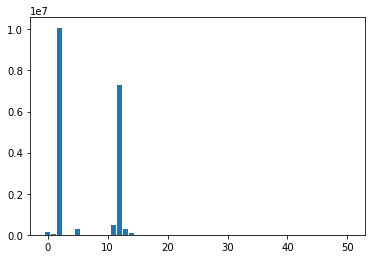

In [2268]:
chiList = []
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    chiList.append(fs.scores_[i])
	
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [2269]:
chiDict = dict(zip(list(df.columns), chiList))
chiDict = {k:[v] for k,v in chiDict.items()}
dfChi = pd.DataFrame(chiDict)
dfChiMelt = pd.melt(dfChi.drop(['SalePrice'], axis =1))
dfChi = dfChiMelt.sort_values('value').iloc[0:20]
dfChi


variable       value
19      RoofMatl    3.650480
28       Heating    5.228688
20   Exterior1st   40.609047
40         Fence   52.778305
42       MiscVal   66.362091
46         OutSq   76.325541
18     RoofStyle  113.649121
22    MasVnrType  123.490081
41   MiscFeature  152.696987
35    GarageType  160.944678
4         Street  185.328915
47         TotBr  186.521136
45         TotSq  191.781648
27  BsmtExposure  207.628309
48    BsmtFinish  208.756405
6       LotShape  211.382708
8      Utilities  261.715824
15    HouseStyle  288.537925
36  GarageFinish  301.527784
10     LandSlope  319.702485

In [2270]:
fig = px.bar(dfChi, x = 'variable', y = 'value', color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Features With Lowest Chi Squared',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Feature',
    yaxis_title = 'Chi Squared',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

**I think we can safely drop Roof Material, Fence, Exterior1st and Heating Features**

In [2271]:
df.drop(['RoofMatl', 'Heating'], axis =1, inplace = True)
finalDF.drop(['RoofMatl', 'Heating'], axis =1, inplace = True)
df.drop(['Fence', 'Exterior1st'], axis =1, inplace = True)
finalDF.drop(['Fence', 'Exterior1st'], axis =1, inplace = True)


## Use Lasso Coefficients to drop variables

In [2272]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearRemodAdd', 'RoofStyle', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition',
       'SalePrice', 'TotSq', 'OutSq', 'TotBr', 'BsmtFinish', 'RemodYN'],
      dtype='object')

In [2273]:
df.drop(['MasVnrType', 'HeatingQC', 'MasVnrArea', 'LotFrontage', 'RemodYN', 'MSSubClass'], axis =1, inplace = True)
finalDF.drop(['MasVnrType', 'HeatingQC', 'MasVnrArea', 'LotFrontage', 'RemodYN', 'MSSubClass'], axis =1, inplace = True)
# Ensemble MAE 14373.814496354415
df.drop(['Exterior2nd','RoofStyle'], axis = 1, inplace = True)
finalDF.drop(['Exterior2nd','RoofStyle'], axis = 1, inplace = True)
# Ensemble MAE 14375.024081451304
df.drop(['BsmtQual','PoolArea'], axis = 1, inplace = True)
finalDF.drop(['BsmtQual','PoolArea'], axis = 1, inplace = True)
# Ensemble MAE 14093.860850241736



In [2274]:
dfAllNumbers.drop(['RoofMatl', 'Heating'], axis = 1 , inplace = True)

In [2275]:
def get_vif2():
    vif_data = pd.DataFrame()
    J = dfAllNumbers.drop(['SalePrice'], axis =1)
    J = J.select_dtypes(['number'])
    vif_data['Feature'] = J.columns
    vif_data['VIF'] = [vif(J.values, i) for i in range(len(J.columns))]
    vif_data
    X = dfAllNumbers.drop(['SalePrice'], axis = 1).select_dtypes(['number'])
    Y = dfAllNumbers.SalePrice
    X2 = sm.add_constant(X)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    pVals = pd.DataFrame()
    pVals['Feature'] = X.columns
    pVals['P-Value'] = [est2.pvalues[i]for i in range(len(X.columns))]
    pVals
    return(pd.merge(vif_data, pVals, on='Feature'))

In [2276]:
get_vif2()

C:\Users\jmeis\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1740: RuntimeWarning:

invalid value encountered in double_scalars



Feature         VIF       P-Value
0           index    4.120034  2.503940e-02
1     LotFrontage    7.340885  6.501036e-01
2         LotArea    5.634895  5.851787e-03
3     OverallQual   78.318178  1.695008e-07
4    YearRemodAdd  920.101136  7.673064e-24
5      MasVnrArea    2.171040  2.740227e-01
6       ExterQual  117.958060  9.439167e-16
7        BsmtQual   41.624200  3.968601e-05
8     KitchenQual   74.357581  6.681533e-01
9      Fireplaces    2.846999  7.592660e-08
10     GarageCars   13.694683  3.552551e-05
11       PoolArea    1.079728  1.773383e-08
12        MiscVal    1.083029  1.234973e-06
13          TotSq   39.605452  4.802073e-01
14          OutSq    3.029815  3.227714e-67
15          TotBr   23.107680  4.944115e-03
16     BsmtFinish    8.335182  3.541213e-04
17     MSSubClass    8.933104  8.503656e-04
18       MSZoning   33.145444  8.550346e-01
19         Street  277.990929  8.358851e-01
20          Alley   20.855620  2.312975e-01
21       LotShape    3.565104  7.897273e-01
22    LandContour   20.932342  2.407228e-01
23      Utilities         NaN  7.130806e-01
24      LotConfig    5.098082  1.330797e-01
25      LandSlope    1.669447  5.266517e-01
26   Neighborhood    6.232942  1.496807e-01
27     Condition1    7.278732  1.922155e-01
28     Condition2  249.065213  6.111460e-01
29       BldgType    1.991621  7.484451e-02
30     HouseStyle    6.519065  6.144621e-09
31      RoofStyle    4.676372  5.029388e-01
32    Exterior1st   31.907281  1.436599e-02
33    Exterior2nd   39.853727  3.610071e-02
34     MasVnrType   12.326575  3.485511e-01
35     Foundation    7.776635  4.481262e-07
36   BsmtExposure    6.797876  2.721149e-04
37      HeatingQC    2.964791  3.877165e-03
38     CentralAir   21.288057  2.005434e-01
39     Electrical   17.237075  2.349558e-01
40     Functional   48.073556  2.101094e-01
41     GarageType    4.633045  2.696180e-04
42   GarageFinish    5.126520  2.748259e-03
43     PavedDrive   20.726612  2.801242e-04
44          Fence   13.820385  2.720545e-01
45    MiscFeature   11.089718  4.427017e-01
46       SaleType   27.330012  9.737441e-01
47  SaleCondition   15.082204  9.756040e-02
48        RemodYN    2.510888  9.064345e-06

In [2277]:
dfAllNumbers.Utilities.value_counts()

0.0    1442
Name: Utilities, dtype: int64

## Scale Numerical Values

In [2278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(['number']).drop(['SalePrice'],axis =1))
scaledDF = pd.DataFrame(scaled_data)
scaledDF.columns = df.select_dtypes(['number']).drop(['SalePrice'], axis =1).columns
df = pd.concat([scaledDF, df.select_dtypes(['object']).reset_index(), df.SalePrice.reset_index()], axis = 1).drop(['index'], axis =1)

In [2279]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(finalDF.select_dtypes(['number']))
scaledDF = pd.DataFrame(scaled_data)
scaledDF.columns = finalDF.select_dtypes(['number']).columns
finalDF = pd.concat([scaledDF, finalDF.select_dtypes(['object']).reset_index()], axis = 1).drop(['index'], axis =1)

## Create Dummy Columns and output CSV V1.5

In [2280]:
# List of Categorical columns

catCols = [i for i in df.select_dtypes(['object'])]
catCols


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'Foundation',
 'BsmtExposure',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [2281]:
version = '1.5'
df.to_csv('../data/Version_1.5/FullSmartVersion_1.5.csv')



In [2282]:
from sklearn.model_selection import train_test_split
XS_train, XS_test, ys_train, ys_test = train_test_split(df.drop(['SalePrice'], axis = 1),df['SalePrice'] , test_size=0.3, shuffle = True, random_state=1)


In [2283]:
X_train = pd.get_dummies(XS_train, columns = catCols, drop_first=True)
X_test = pd.get_dummies(XS_test, columns = catCols, drop_first=True)
finalSmartDF = finalDF
finalDF = pd.get_dummies(finalDF, columns = catCols, drop_first=True)

In [2284]:
y_train=ys_train
y_test=ys_test

In [2285]:
X_train.to_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/x_Train.csv', index=False)
X_test.to_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/x_Test.csv', index=False)
y_train.to_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/y_Train.csv', index=False)
y_test.to_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/y_Test.csv', index=False)
finalDF.to_csv('../data/Version_1.5/TestDumbVersion_1.5.csv')

## Perform Label Encoding on XS data sets

In [2286]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
XS2train = XS_train.select_dtypes(['object']).apply(le.fit_transform)
XS2test = XS_test.select_dtypes(['object']).apply(le.fit_transform)
Final2DF = finalSmartDF.select_dtypes(['object']).apply(le.fit_transform)
XS_train = pd.concat([XS_train.select_dtypes(['number']), XS2train],axis = 1)
XS_test = pd.concat([XS_test.select_dtypes(['number']), XS2test],axis = 1)
finalSmartDF = pd.concat([finalSmartDF.select_dtypes(['number']), Final2DF],axis = 1)

In [2287]:
XS_train.to_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/xs_Train.csv', index=False)
XS_test.to_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/xs_Test.csv', index=False)
ys_train.to_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/ys_Train.csv', index=False)
ys_test.to_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/ys_Test.csv', index=False)
finalSmartDF.to_csv('../Data/Version_1.5/TestSmartVersion_1.5.csv', index=False)

### Create Feature List Text file

In [2288]:
with open('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.4/FeatureExplanation.txt', 'w') as f:
    f.write('Feature Explanation\n\
            Dropped Low Count Categorical Values\n\
            Created 3 new metrics for total indor square footage, total outdoor square footage, and total bathrooms, dropped other columns\n\
            Created a combined quality and condition variabel weighted by correlation to target\n\
            Changed nominal categorical values to ordinal\n\
            Created dummy variables and dropped first, sampled by shuffle\n\
            Converted GarageYrBlt to numeric, and changed None values to 0\n\
            Deleted basement finished and unfinished columns, created a percent finished col\n\
            Deleted Years House Remodeled, and Year House Built\n\
            Deleted Garage Area, has the same info as garage number of cars\n\
            Deleted Garage Year Built, not relevant\n\
            Converted MSSubClass to string (categorical)'            
           )